In [ ]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/DespesasPagamentos2017.csv', encoding='latin-1', sep=';')

In [ ]:
df = df.drop(columns=['Parcela', 'Licitação', 'Competência', 'Conta', 'Número da Transação'])

In [ ]:
def valorPuro(x):
  p = x.split(' ')
  res = p[1].replace('.', '')
  res = res.replace(',', '.')
  return res

df['Valor'] = df['Valor'].apply(valorPuro).astype(float)
df['Retenção'] = df['Retenção'].apply(valorPuro).astype(float)
df['Valor Líquido'] = df['Valor Líquido'].apply(valorPuro).astype(float)

df['Data'] = df['Data'].astype('datetime64[ns]')

#**Processos Administrativos**

In [ ]:
modalidade = df.Modalidade.value_counts()

def percent(x):
  todo = modalidade.Total.sum()
  p = (100 * int(x) )/ todo
  return round(p, 2)


modalidade = pd.DataFrame(df.Modalidade.value_counts()).reset_index()
modalidade.columns = ['Modalidade','Total']

modalidade['Porcentagem'] = modalidade.Total.apply(percent).apply( lambda x: f'{str(x)}%')
modalidade

,Modalidade,Total,Porcentagem
0,9 - Sem Licitação,6349,57.47%
1,6 - Dispensa por Valor,4187,37.9%
2,11 - Pregão Presencial,256,2.32%
3,7 - Dispensa por Outros Motivos,88,0.8%
4,2 - Tomada de Preço,68,0.62%
5,8 - Inexigível,65,0.59%
6,0 - Pregão (Eletrônico e Presencial),22,0.2%
7,13 - Chamada Pública,10,0.09%
8,12 - Adesão a Registro de Preço,3,0.03%


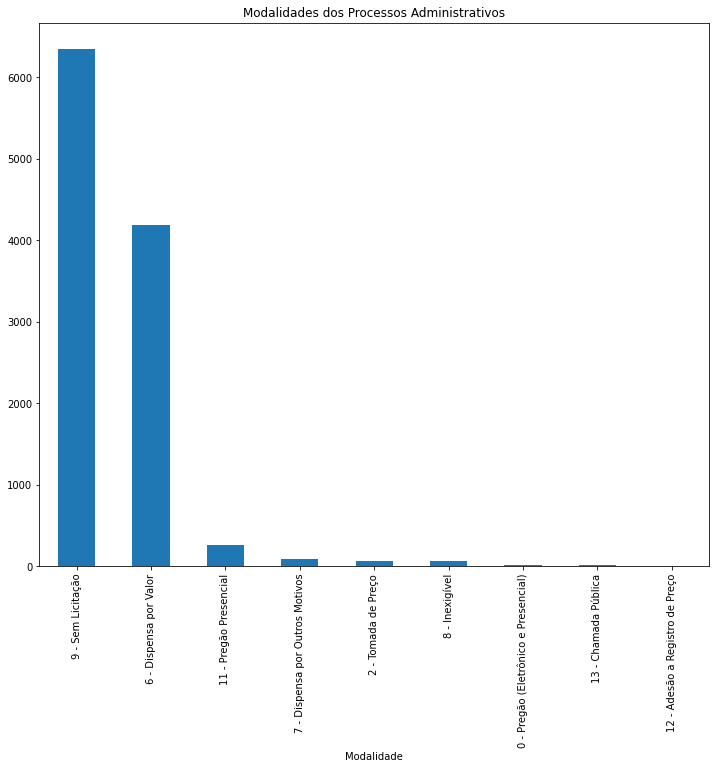

In [ ]:
modalidade.plot(kind='bar', x='Modalidade', y='Total', legend=None, title='Modalidades dos Processos Administrativos', figsize=(12,10s))
plt.show()

#**Fornecedores que mais ganharam na modalidade sem licitação**

In [ ]:
modalidade9 = pd.DataFrame(df[df['Modalidade'] == '9 - Sem Licitação'])
modalidade9
modalidade9 = df.groupby('Fornecedor')
modalidade9['Fornecedor'].count()
x = modalidade9['Valor'].sum()

modalidade9 = pd.DataFrame(x).reset_index()
modalidade9.sort_values('Valor', ascending=False).head()

,Fornecedor,Valor
51,6 - SME FUNDAMENTAL FUNDEB 60% EFETIVOS,3242665.61
18,24 - SME FUNDAMENTAL FUNDEB 40%,1566272.65
1019,I.P.M - INST.PRE.SERV.MUNICIPAIS,1521526.02
62,9 - SEC. MUN. DE INFRA ESTRUTURA EFETIVOS,1142285.31
856,FOLHA DE PAGAMENTO,1134963.00


#**Fornecedores que mais ganharam na modalidade dispensa por valor**

In [ ]:
modalidade6 = pd.DataFrame(df[df['Modalidade'] == '6 - Dispensa por Valor'])
modalidade6
modalidade6 = df.groupby('Fornecedor')
modalidade6['Fornecedor'].count()
x = modalidade6['Valor'].sum()

modalidade6 = pd.DataFrame(x).reset_index()
modalidade6.sort_values('Valor', ascending=False).head()

,Fornecedor,Valor
51,6 - SME FUNDAMENTAL FUNDEB 60% EFETIVOS,3242665.61
18,24 - SME FUNDAMENTAL FUNDEB 40%,1566272.65
1019,I.P.M - INST.PRE.SERV.MUNICIPAIS,1521526.02
62,9 - SEC. MUN. DE INFRA ESTRUTURA EFETIVOS,1142285.31
856,FOLHA DE PAGAMENTO,1134963.00


#**Tendência dos gastos ao longo de 2017**

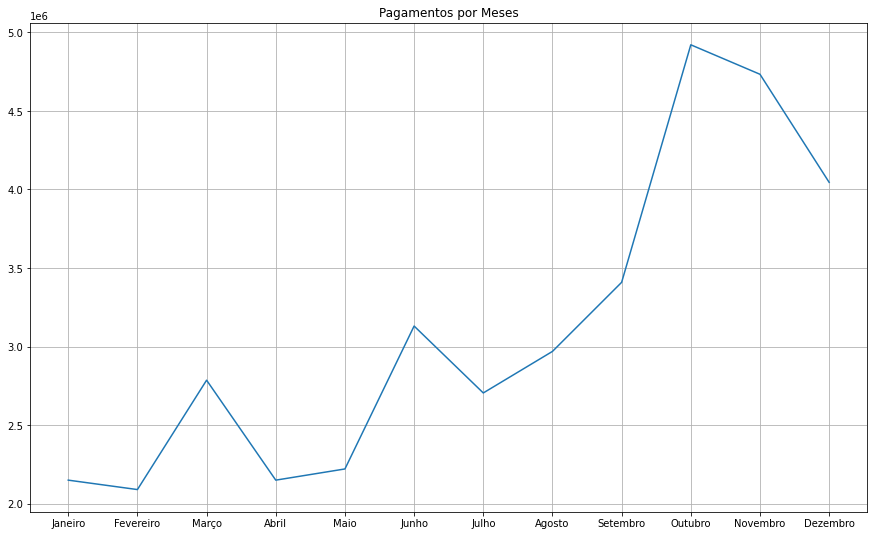

In [ ]:
valor_janeiro = mes_janeiro['Valor'].sum()
valor_fevereiro = mes_fevereiro['Valor'].sum()
valor_marco = mes_marco['Valor'].sum()
valor_janeiro = mes_abril['Valor'].sum()
valor_maio = mes_maio['Valor'].sum()
valor_junho = mes_junho['Valor'].sum()
valor_julho = mes_julho['Valor'].sum()
valor_agosto = mes_agosto['Valor'].sum()
valor_setembro = mes_setembro['Valor'].sum()
valor_outubro = mes_outubro['Valor'].sum()
valor_novembro = mes_novembro['Valor'].sum()
valor_dezembro = mes_dezembro['Valor'].sum()

pagamentos = [valor_janeiro, valor_fevereiro, valor_marco, valor_janeiro, valor_maio, valor_junho, valor_julho, valor_agosto, valor_setembro, valor_outubro, valor_novembro, valor_dezembro]
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

plt.figure(1, figsize=(15, 9))
plt.plot (meses, pagamentos, label='Pagamentos')
plt.title('Pagamentos por Meses')
plt.grid(True)
plt.show()

#**Disperção dos valores gastos ao longo de 2017**

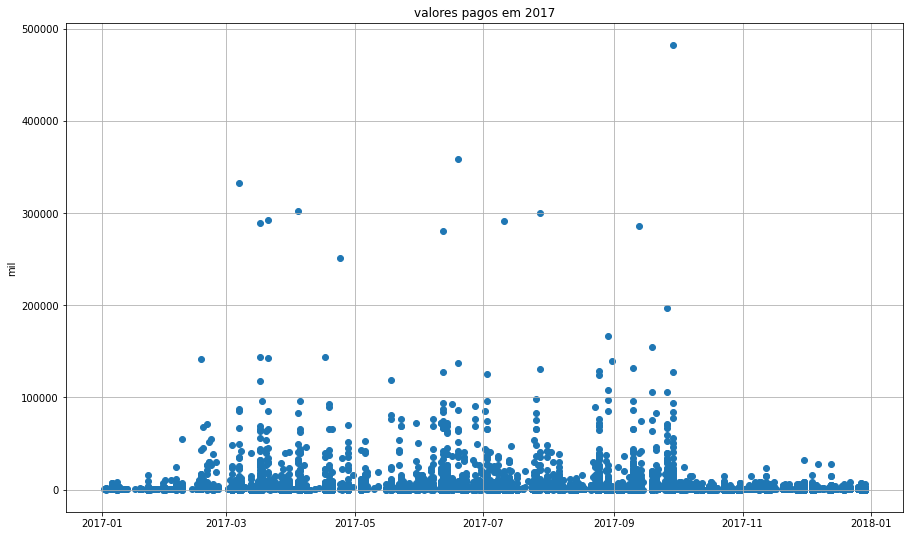

In [ ]:
valor = df['Valor']
data =  df['Data'].sort_values()

plt.figure(1, figsize=(15, 9))
plt.scatter (data, valor)
plt.ylabel('mil')
plt.title('valores pagos em 2017')
plt.grid(True)
plt.show()

##**Fonte dos Recursos**

In [ ]:
df1['Fonte Recurso'].value_counts()

110101 - Recursos Ordinários                                                                  3487
110301 - Gastos com Saúde 15% LC 141                                                          3292
311301 - Média e Alta Complexidade Ambulatorial e Hospitalar                                  1352
110201 - Gasto com Educação 25% art. 212 CF/1988                                              1325
311101 - Piso de Atenção Básica Fixo                                                           749
410107 - CRAS - Centro de Referência em Assistência Social                                      98
220104 - Programa Nacional Alimentação Escolar                                                  82
210201 - FUNDEB 40% - Demais Gastos                                                             68
311799 - Outros Programas SUS                                                                   64
410109 - SCFV - Serviços de Convivência e Fortalecimento de Vínculos                            61
210101 - F

##**Elemento da Despesa:**

In [ ]:
df['Elemento Despesa'].value_counts()


36  Outros Serviços de Terceiros - Pessoa Física              5329
39  Outros Serviços de Terceiros - Pessoa Jurídica            1908
30  Material de Consumo                                       1370
48  Outros Auxílios Financeiros a Pessoas Físicas              844
11  Vencimentos e Vantagens Fixas - Pessoal Civil              557
14  Diárias - Civil                                            343
13  Obrigações Patronais                                       150
47  Obrigações Tributárias e Contributivas                     131
91  Sentenças Judiciais                                        115
52  Equipamentos e Material Permanente                          79
71  Principal da Dívida Contratual Resgatado                    61
31  Premiações Culturais, Artísticas, Desportivas e Outras      52
04  Contratação por Tempo Determinado                           29
41  Contribuições                                               26
93  Indenizações e Restituições                               

#**Outros Auxílios Financeiros a Pessoas Físicas**

###**Pagamentos individuais**

In [ ]:
df[df['Elemento Despesa'] == '48  Outros Auxílios Financeiros a Pessoas Físicas'].sort_values(by='Valor', ascending=False).head()

,Data,Fonte Recurso,Histórico,Modalidade,Fornecedor,Tipo Transação,Valor,Retenção,Valor Líquido,Elemento Despesa
4146,2017-08-30,110301 - Gastos com Saúde 15% LC 141,QUITAÇÃO TOTAL DESTE EMPENHO,11 - Pregão Presencial,ANTONIO PEDRO DE SIQUEIRA,OUTROS,36121.1,0.0,36121.1,48 Outros Auxílios Financeiros a Pessoas Físicas
6492,2017-11-12,110301 - Gastos com Saúde 15% LC 141,QUITAÇÃO TOTAL DESTE EMPENHO,9 - Sem Licitação,KARINA RODRIGUES DA SILVA,OUTROS,7823.7,0.0,7823.7,48 Outros Auxílios Financeiros a Pessoas Físicas
3741,2017-02-08,110301 - Gastos com Saúde 15% LC 141,QUITAÇÃO TOTAL DESTE EMPENHO,11 - Pregão Presencial,TEREZINHA CORDEIRO DA SILVA,OUTROS,6481.9,0.0,6481.9,48 Outros Auxílios Financeiros a Pessoas Físicas
3758,2017-08-29,110301 - Gastos com Saúde 15% LC 141,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,RITA COSTA BARBOSA,OUTROS,5600.0,0.0,5600.0,48 Outros Auxílios Financeiros a Pessoas Físicas
3738,2017-02-08,110301 - Gastos com Saúde 15% LC 141,QUITAÇÃO TOTAL DESTE EMPENHO,11 - Pregão Presencial,LUZINETE FERNANDES DA SILVA,OUTROS,5195.0,0.0,5195.0,48 Outros Auxílios Financeiros a Pessoas Físicas


###**Somatório dos valores pagos a cada fornecedor**
... do elemento despesa 'Outros Auxílios Financeiros a Pessoas Físicas'

In [ ]:
ElementoDespesa = pd.DataFrame(df[df['Elemento Despesa'] == '48  Outros Auxílios Financeiros a Pessoas Físicas'])

ElementoDespesa = df.groupby('Fornecedor')
ElementoDespesa['Fornecedor'].count()
x = ElementoDespesa['Valor'].sum()

ElementoDespesa = pd.DataFrame(x).reset_index()
ElementoDespesa.sort_values('Valor', ascending=False).head()

,Fornecedor,Valor
51,6 - SME FUNDAMENTAL FUNDEB 60% EFETIVOS,3242665.61
18,24 - SME FUNDAMENTAL FUNDEB 40%,1566272.65
1019,I.P.M - INST.PRE.SERV.MUNICIPAIS,1521526.02
62,9 - SEC. MUN. DE INFRA ESTRUTURA EFETIVOS,1142285.31
856,FOLHA DE PAGAMENTO,1134963.00


#**Premiações Culturais, Artísticas, Desportivas e Outras**

... do elemento despesa 'Premiações Culturais, Artísticas, Desportivas e Outras'

###**Dez Pessoas que mais ganharam com premiação:**

In [ ]:
df[df['Elemento Despesa'] == '31  Premiações Culturais, Artísticas, Desportivas e Outras' ].nlargest(10,'Valor').head()

,Data,Fonte Recurso,Histórico,Modalidade,Fornecedor,Tipo Transação,Valor,Retenção,Valor Líquido,Elemento Despesa
7135,2017-02-22,110101 - Recursos Ordinários,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,ALBERTO COSMO PATRIOTA,CHEQUE,4000.0,0.0,4000.0,"31 Premiações Culturais, Artísticas, Desporti..."
7141,2017-02-22,110101 - Recursos Ordinários,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,FRANCISCO HELIO COSTA MIRA,CHEQUE,2000.0,0.0,2000.0,"31 Premiações Culturais, Artísticas, Desporti..."
10533,2017-11-12,110101 - Recursos Ordinários,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,CLAUDEMIR DA COSTA,CHEQUE,1600.0,0.0,1600.0,"31 Premiações Culturais, Artísticas, Desporti..."
7118,2017-02-22,110101 - Recursos Ordinários,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,JACKSON RODRIGO DOS SANTOS SILVA,CHEQUE,1500.0,0.0,1500.0,"31 Premiações Culturais, Artísticas, Desporti..."
7134,2017-02-22,110101 - Recursos Ordinários,QUITAÇÃO TOTAL DESTE EMPENHO,6 - Dispensa por Valor,JOSÉ DENNYS FERREIRA ESTEVAM,CHEQUE,1500.0,0.0,1500.0,"31 Premiações Culturais, Artísticas, Desporti..."
